# Analyzing simple experiments

This notebook shows you how to analyze simple experiments. We expect basic knowledge from CCS1 and CCS2 - have a look at the course materials if you are unsure.

In [55]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

## Loading the dataset

We first load the dataset and inspect it.
We also do necessary recoding.
Note that this is a "fake" dataset with data I simulated; also note that your dataset may look slightly different. You should know everything about loading, recoding etc. from CCS1 and CCS2.

In [47]:
df = pd.read_csv("data.csv")
df

,dv,group,gender,age
0,3.125799,1,male,26
1,2.366678,1,female,24
2,3.013840,1,male,18
3,1.856299,1,male,27
4,3.788798,1,female,22
...,...,...,...,...
360,3.194810,4,female,25
361,4.590034,4,male,18
362,4.089445,4,male,20
363,3.443459,4,female,20


### Let's look at what we have:

In [50]:
df['dv'].describe()

count    365.000000
mean       3.383098
std        0.755077
min        1.428526
25%        2.865476
50%        3.390215
75%        3.897036
max        5.802799
Name: dv, dtype: float64

In [52]:
df['group'].value_counts(sort=False)

1     98
2     77
3    102
4     88
Name: group, dtype: int64

In [53]:
df['gender'].value_counts(sort=False)

male      193
female    172
Name: gender, dtype: int64

In [54]:
df['age'].describe()

count    365.000000
mean      22.736986
std        2.902609
min       18.000000
25%       20.000000
50%       23.000000
75%       25.000000
max       27.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

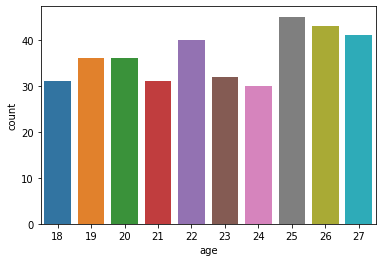

In [68]:
#or some plotting if we like
sns.countplot(x='age', data=df)

<AxesSubplot:xlabel='dv', ylabel='Count'>

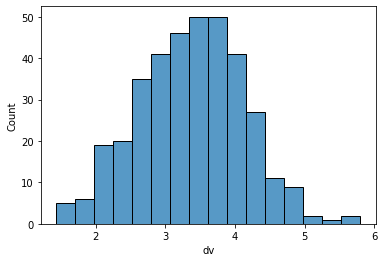

In [66]:
sns.histplot(x='dv', data=df)

## Some simple group comparison

<AxesSubplot:xlabel='group', ylabel='dv'>

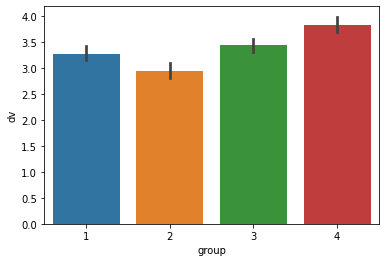

In [70]:
sns.barplot(y='dv', x='group', data=df)

<AxesSubplot:xlabel='group', ylabel='dv'>

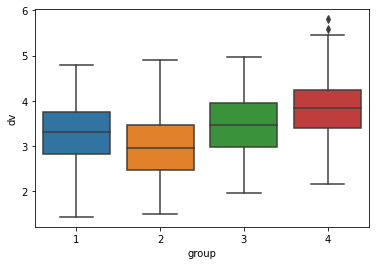

In [81]:
# maybe a boxplot is nicer?

sns.boxplot(y='dv', x='group', data=df)

In [79]:
# how does the dv differ?
df.groupby('group')['dv'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
1,98.0,3.272706,0.691306,1.428526,2.821665,3.305498,3.760571,4.796552
2,77.0,2.941768,0.695712,1.493880,2.463041,2.946119,3.470892,4.906704
3,102.0,3.439727,0.675162,1.948577,2.983307,3.470620,3.943603,4.973289
4,88.0,3.826560,0.715388,2.153351,3.396277,3.830987,4.245062,5.802799


# Statistical analysis

TODO --- I'll put ANOVA, T-Test, whatever you want in here, just let me know.

For now a regression, as that's what I always do ;-)

In [76]:
ols("dv~C(group) + age + C(gender)", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dv   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           7.91e-13
Time:                        20:44:20   Log-Likelihood:                -381.59
No. Observations:                 365   AIC:                             775.2
Df Residuals:                     359   BIC:                             798.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3063      0.297     11.119      0.000       2.722       3.891
C(group)[T.2]        -0.3379      0.106     -3.192      0.002      -0.546      -0.130
C(group)[T.3]         0.1757      0.099      1.783      0.075      -0.018       0.370
C(group)[T.4]         0.5491      0.102      5.380      0.000       0.348       0.750
C(gender)[T.male]    -0.0926      0.073     -1.260      0.208      -0.237       0.052
age                   0.0007      0.013      0.054      0.957      -0.024       0.025
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.254
Skew:                           0.001   Prob(JB):                        0.881
Kurtosis:                       2.871   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""